In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

task 1

In [29]:
file = "datasets/yearly_deaths_by_clinic.csv"
yearly = pd.read_csv(file)
yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


Task2

In [30]:
yearly["proportion_deaths"] = yearly['deaths']/yearly["births"]

In [31]:
yearly["clinic"].unique()

array(['clinic 1', 'clinic 2'], dtype=object)

In [32]:
yearly1 = yearly[yearly['clinic'] == "clinic 1"]
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [33]:
yearly2 = yearly[yearly['clinic'] == "clinic 2"]
yearly2

,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


Task 3

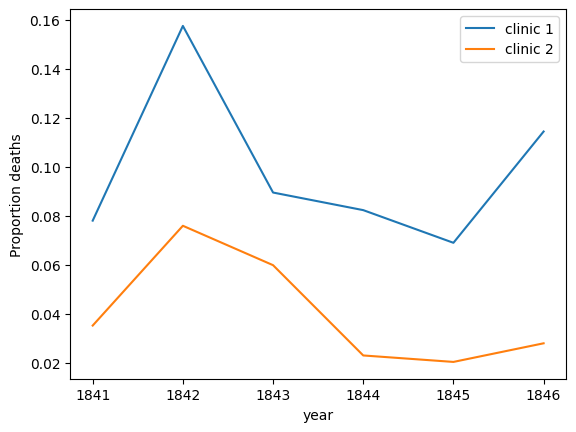

In [34]:
ax = yearly1.plot(x="year", y="proportion_deaths",
              label="clinic 1")
yearly2.plot(x="year", y="proportion_deaths",
         label="clinic 2", ax=ax)
ax.set_ylabel("Proportion deaths")
# Displaying the plot
plt.show()

Task 4

In [35]:
monthly = pd.read_csv("datasets/monthly_deaths.csv",parse_dates=["date"])
monthly["proportion_deaths"] = monthly['deaths']/monthly["births"]
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


Task 5


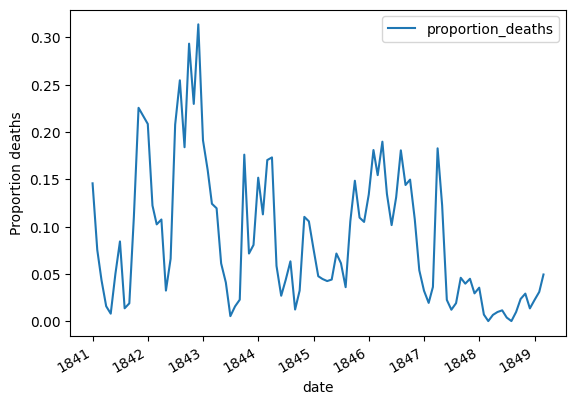

In [36]:
ax = monthly.plot(x="date", y="proportion_deaths")
ax.set_ylabel("Proportion deaths")
# Displaying the plot
plt.show()

Task 6

<Axes: xlabel='date'>

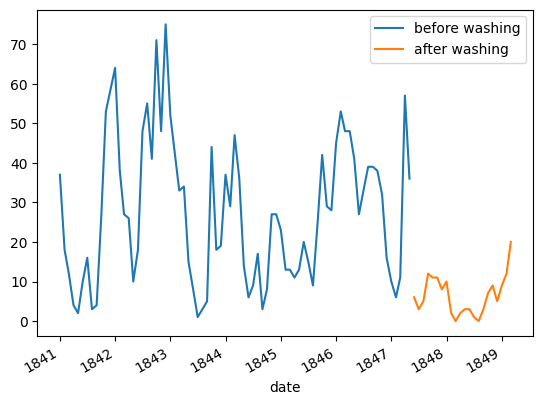

In [37]:
handwashing_start = pd.to_datetime('1847-06-01')

before_washing = monthly[pd.to_datetime(monthly['date']) < handwashing_start]
after_washing = monthly[pd.to_datetime(monthly['date']) >=handwashing_start]

ax = before_washing.plot(x='date', y='deaths', label='before washing')
after_washing.plot(x='date', y='deaths', label='after washing',ax=ax)

Task 7

In [38]:
before_proportion = before_washing['proportion_deaths']
after_proportion =  after_washing['proportion_deaths']
Change = after_proportion.mean() - before_proportion.mean()
print(Change)

-0.08395660751183336


Task 8

In [40]:
boot_mean = list()
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean.append(boot_before.mean() - boot_after.mean())
confidence_interval = pd.Series(boot_mean).quantile([0.025, 0.975])
print(confidence_interval)

0.025    0.067250
0.975    0.100333
dtype: float64


Task 9

Doctors shouls definetely wash their hand , we have seen the visualization of the proportional deaths has decreased after using hand wash.Therefore,Doctors should wash their hands